Task - 1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21 

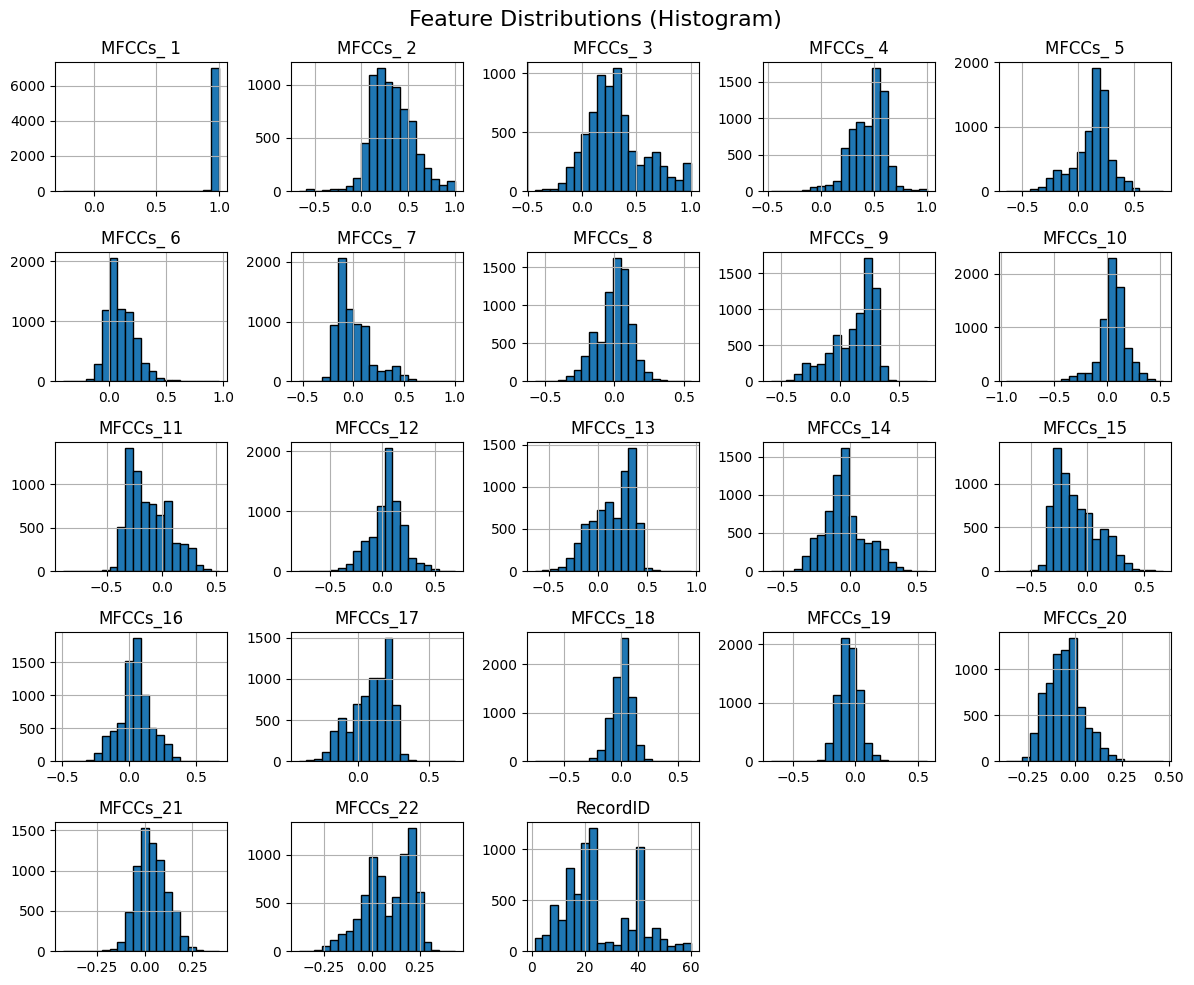

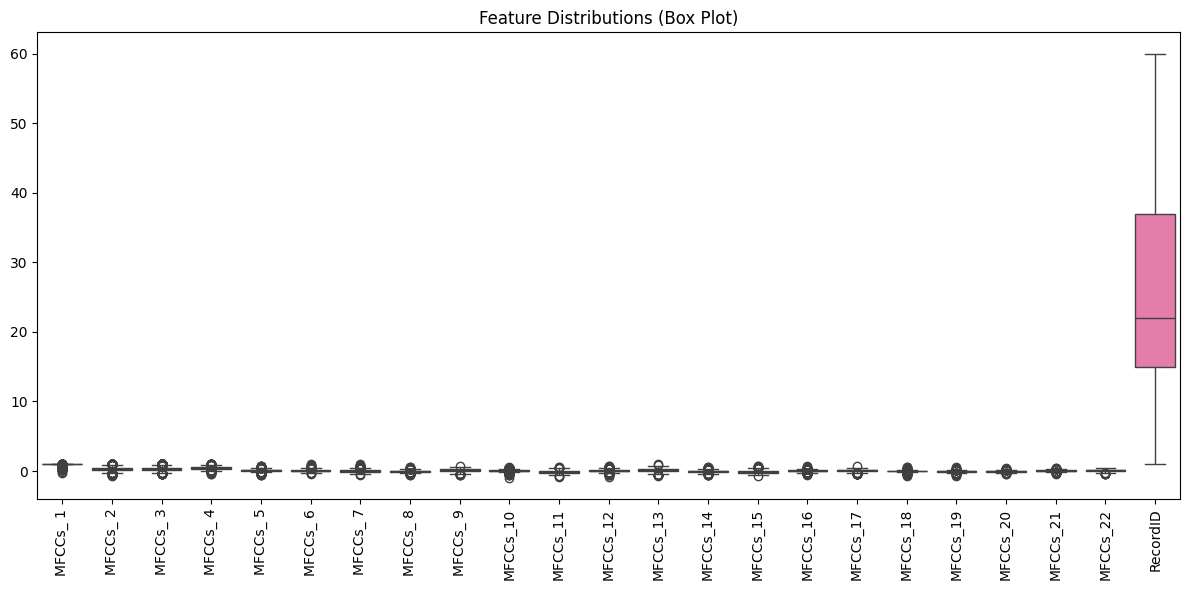

Original Features: 23, Engineered Features: 276


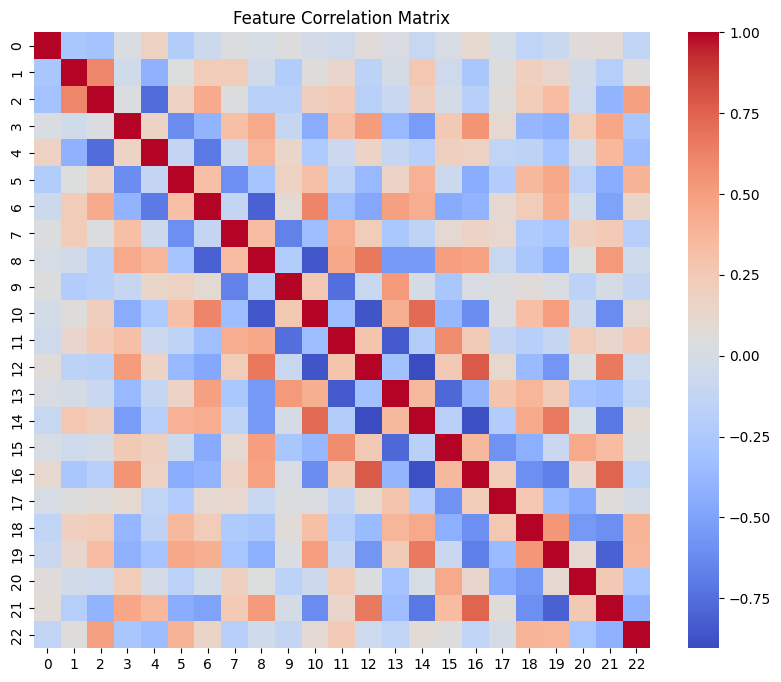

Reduced Feature Set: 22 features


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the dataset
data = pd.read_csv("Frogs_MFCCs.csv")  # Replace with your dataset path

# Separate numeric features and categorical labels
features = data.select_dtypes(include=[np.number])  # Keep only numeric data for clustering
labels = data.select_dtypes(exclude=[np.number])  # Labels for reference, not used in clustering

# 1.1 Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(data.info())

# Visualize the distribution of numeric features using histograms
features.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions (Histogram)", fontsize=16)
plt.tight_layout()
plt.show()

# Plot the box plot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=features)
plt.title("Feature Distributions (Box Plot)")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# 1.2 Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 1.3 Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
engineered_features = poly.fit_transform(scaled_features)
print(f"Original Features: {scaled_features.shape[1]}, Engineered Features: {engineered_features.shape[1]}")

# 1.4 Feature Correlation Analysis
correlation_matrix = np.corrcoef(scaled_features, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Remove highly correlated features (correlation > 0.9)
correlated_features = set()
threshold = 0.9
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix[i][j]) > threshold:
            correlated_features.add(i)

# Use only non-correlated features
features_reduced = np.delete(scaled_features, list(correlated_features), axis=1)
print(f"Reduced Feature Set: {features_reduced.shape[1]} features")


Task -2


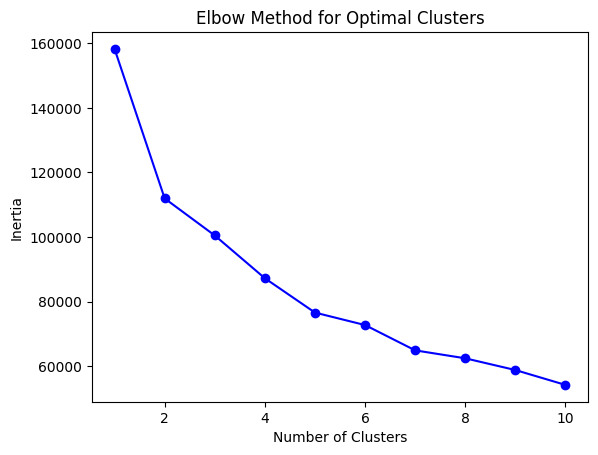

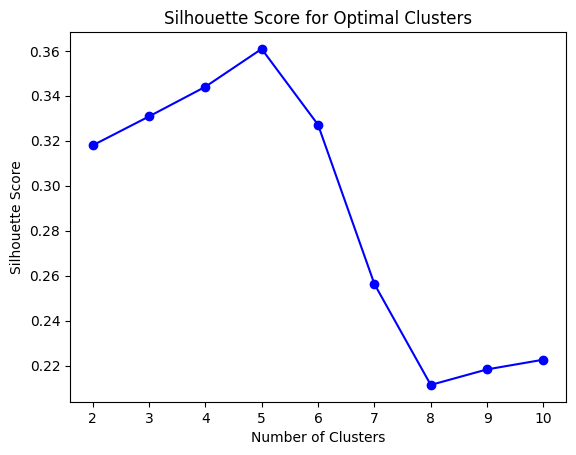

Cluster Initialization Comparison:
Inertia with random initialization: 96626.22356220048
Inertia with k-means++ initialization: 100471.0871235318


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 2.1 Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_reduced)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# 2.2 Silhouette Score Evaluation
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_reduced)
    silhouette_scores.append(silhouette_score(features_reduced, labels))

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Clusters")
plt.show()

# 2.3 K-Means Clustering Implementation
optimal_k = 3  # Replace with the chosen optimal k from analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(features_reduced)

# 2.4 Cluster Initialization Comparison
# Comparing random initialization vs k-means++ initialization

# K-Means with random initialization
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)
kmeans_random.fit(features_reduced)
inertia_random = kmeans_random.inertia_

# K-Means with k-means++ initialization
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_plus.fit(features_reduced)
inertia_plus = kmeans_plus.inertia_

# Print the inertia for each initialization method
print("Cluster Initialization Comparison:")
print(f"Inertia with random initialization: {inertia_random}")
print(f"Inertia with k-means++ initialization: {inertia_plus}")


Task -3

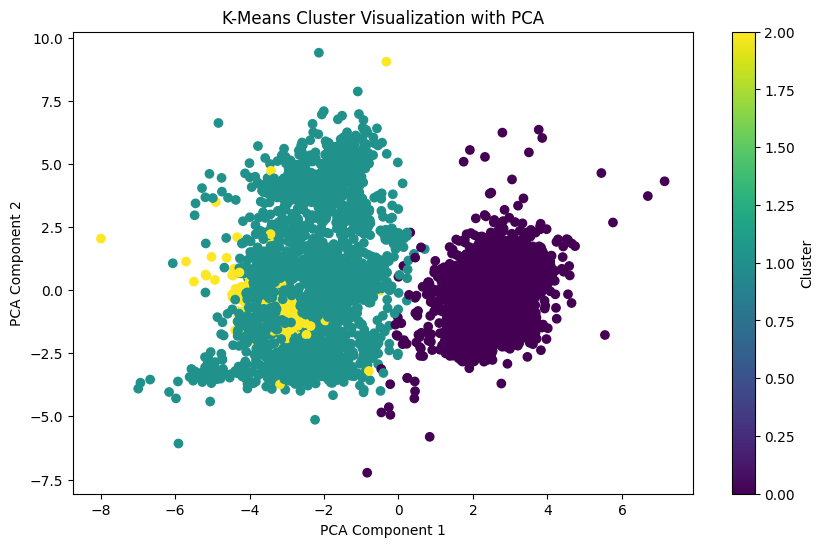

PCA Components (Feature Contributions):
 [[ 0.05233981 -0.07848672 -0.13214396  0.24575269  0.16031445 -0.21368655
  -0.27433907  0.16438172  0.29764429 -0.10526398 -0.30041277  0.18240174
   0.28829986 -0.23755118  0.2123165   0.29268711 -0.01932216 -0.239764
  -0.26243025  0.10921039  0.30661634 -0.11595478]
 [-0.1516829   0.27666392  0.37855376  0.02032529 -0.27712705  0.06006827
   0.06041188  0.18776351  0.07461021 -0.37378914 -0.03005775  0.40452416
  -0.03885427 -0.31692984  0.2390745  -0.08574696 -0.14600812  0.03359933
   0.18231348  0.11989467 -0.15050786  0.26156553]]


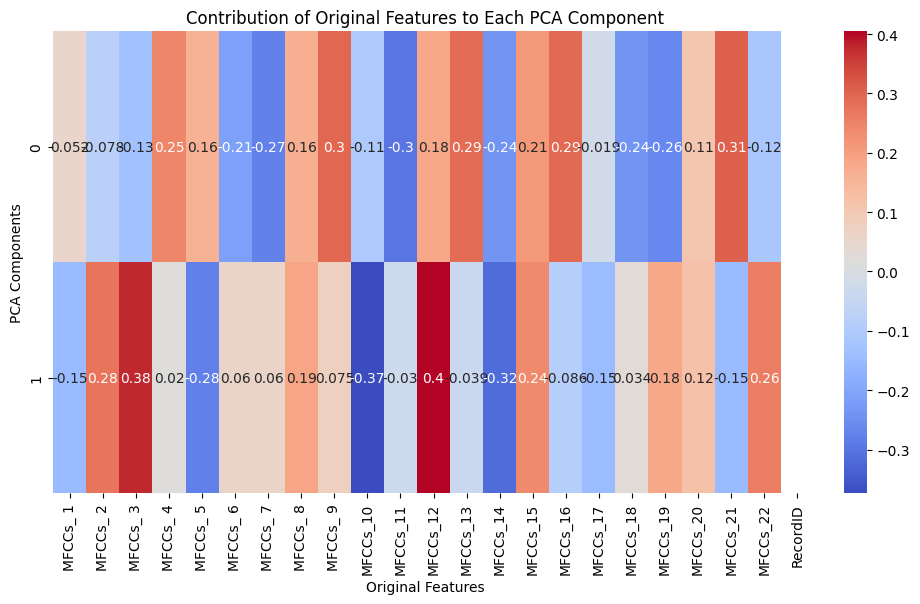

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Dimensionality Reduction for Visualization
# Reduce features to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_reduced)

# Scatter plot of K-Means clusters in PCA-reduced 2D space
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Cluster Visualization with PCA")
plt.colorbar(label='Cluster')
plt.show()

# 3.2 Feature Contribution to Clustering
# Display PCA components to analyze feature contributions
print("PCA Components (Feature Contributions):\n", pca.components_)

# Optional: Visualize the contribution of original features to each PCA component
plt.figure(figsize=(12, 6))
sns.heatmap(pca.components_, annot=True, cmap='coolwarm', xticklabels=features.columns)
plt.xlabel("Original Features")
plt.ylabel("PCA Components")
plt.title("Contribution of Original Features to Each PCA Component")
plt.show()


Task - 4

Cluster Evaluation Metrics Matrix:
   Number of Clusters  Davies-Bouldin Index  Calinski-Harabasz Index
0                   2              1.373738              2977.428712
1                   3              1.520733              2069.419339
2                   4              1.556521              1953.488839
3                   5              1.344466              1918.245699
4                   6              1.497531              1692.506050
5                   7              1.503695              1725.564637
6                   8              1.591758              1577.602155
7                   9              1.552163              1521.234869
8                  10              1.503413              1535.120139


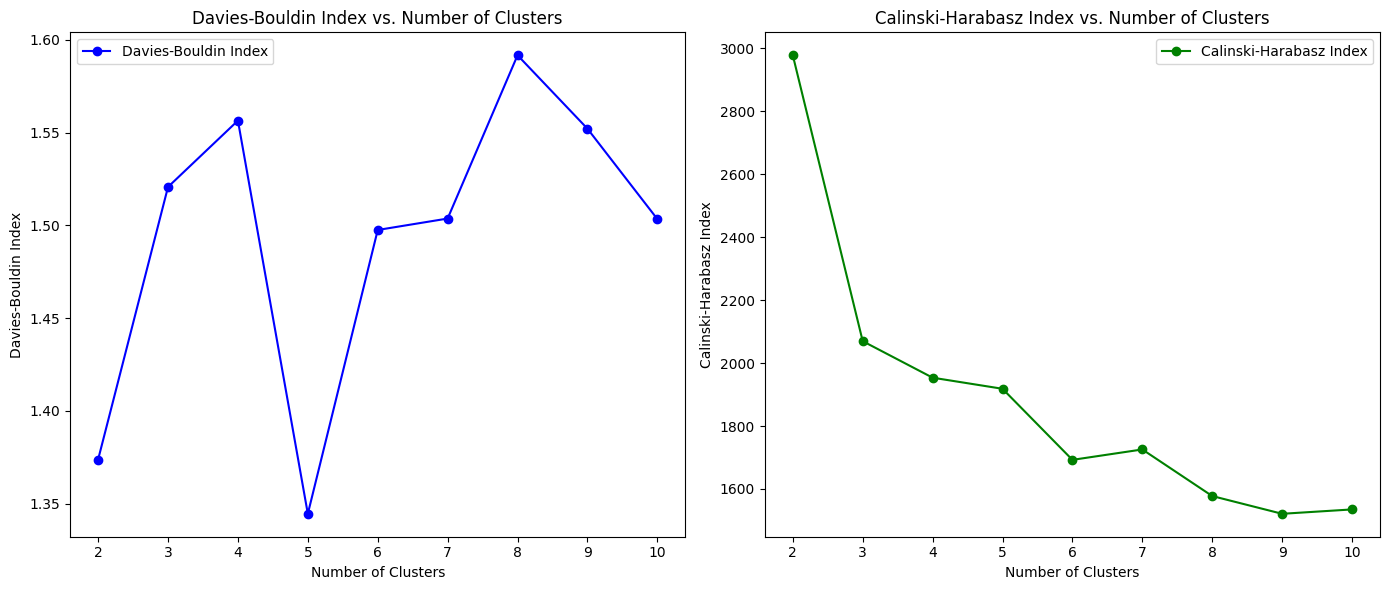

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

# Range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Lists to store the scores for each cluster count
db_scores = []
ch_scores = []

# Calculate metrics for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_reduced)
    db_scores.append(davies_bouldin_score(features_reduced, labels))
    ch_scores.append(calinski_harabasz_score(features_reduced, labels))

# Create a DataFrame to display the metrics in a matrix format
evaluation_metrics = pd.DataFrame({
    "Number of Clusters": list(cluster_range),
    "Davies-Bouldin Index": db_scores,
    "Calinski-Harabasz Index": ch_scores
})

print("Cluster Evaluation Metrics Matrix:")
print(evaluation_metrics)

# Plot the metrics to compare across cluster numbers
plt.figure(figsize=(14, 6))

# Plot for Davies-Bouldin Index
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, 'bo-', label="Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.legend()

# Plot for Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, ch_scores, 'go-', label="Calinski-Harabasz Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index vs. Number of Clusters")
plt.legend()

plt.tight_layout()
plt.show()


Task - 5

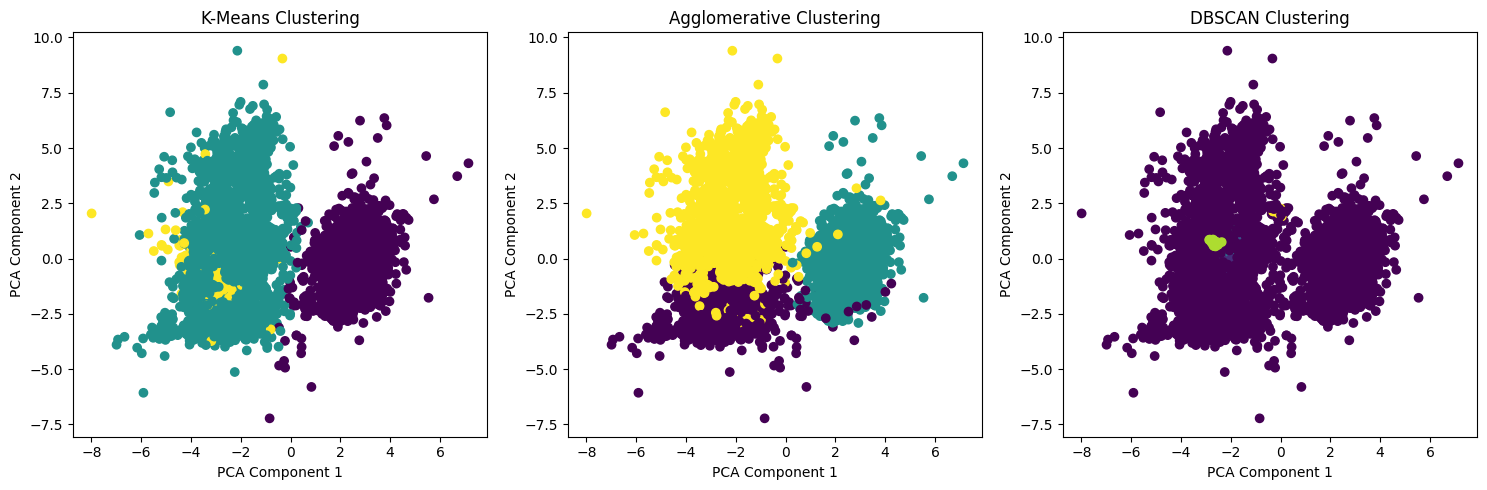

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import matplotlib.pyplot as plt

# Define optimal number of clusters based on K-Means analysis
optimal_k = 3  # Replace this with the actual optimal K identified earlier

# Apply K-Means Clustering (for comparison)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_reduced)

# Apply Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(features_reduced)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_reduced)

# 5.1 Visualize the clustering results in PCA-reduced 2D space for comparison

# PCA visualization setup
plt.figure(figsize=(15, 5))

# Plot K-Means results
plt.subplot(1, 3, 1)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering")

# Plot Agglomerative Clustering results
plt.subplot(1, 3, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=agglo_labels, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering")

# Plot DBSCAN results
plt.subplot(1, 3, 3)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()
